In [1]:
from web3 import Web3
import json
import requests
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math

In [2]:
import pandas as pd
import os
os.chdir('C:\\Users\\Shyam\\Documents\\GitHub\\beacondigest\\notebooks\\2021\\even more eip1559 paper\\random_forest_regression')

In [4]:
df1 = pd.read_csv('galaxyeggs-clean.csv',low_memory = False)
df1 = df1[df1['toaddress'] == '0xa08126f5e1ed91a635987071e6ff5eb2aeb67c48']
df1.head(5)

,detecttime,hash,status,gas,gasprice,curblocknumber,timepending,blockspending,replace,fromaddress,toaddress,nonce,type,basefeepergas,maxpriorityfeepergas,maxfeepergas
719,2021-09-14T23:58:57.567Z,0x81a4a7b8c04dd5e52871c0fb93d1e307aad642d4faaa...,pending,97372,NaN,13226948,NaN,NaN,NaN,0x654d250d18f97ccfb403f65886adf996092055e5,0xa08126f5e1ed91a635987071e6ff5eb2aeb67c48,34,2,52963574315,1.500000e+09,8.553145e+10
2138,2021-09-14T23:56:57.152Z,0x838050e4beef7e42acdbb3d75d86cfa9fefe91b0a0e0...,pending,46703,NaN,13226941,NaN,NaN,NaN,0x99a65e16155b1ff8c84144b9ad2f76bf8ab05394,0xa08126f5e1ed91a635987071e6ff5eb2aeb67c48,136,2,47277603109,1.500000e+09,6.581064e+10
2730,2021-09-14T23:56:10.753Z,0x452f91a16e4e4179b2730acbfff23029067186ef3ba9...,pending,46703,NaN,13226940,NaN,NaN,NaN,0xee144352012008b453dd96b2718781b0b1b73dff,0xa08126f5e1ed91a635987071e6ff5eb2aeb67c48,2,2,44237642456,1.500000e+09,6.343270e+10
3377,2021-09-14T23:55:24.007Z,0xe34af90d269f5cf318393c67efac1e06b5685ad2e110...,pending,46703,NaN,13226936,NaN,NaN,NaN,0xba1d60be6a8bf2201a39994ef31a342c0dbc4ebf,0xa08126f5e1ed91a635987071e6ff5eb2aeb67c48,97,2,32267059831,7.000000e+10,7.000000e+10
3495,2021-09-14T23:55:13.549Z,0x0d8a055e14c39127ab2d616eb5142a31ee3687dec856...,pending,80272,NaN,13226936,NaN,NaN,NaN,0x98efe9eeddfb788dbb0ab556988665b62c568aca,0xa08126f5e1ed91a635987071e6ff5eb2aeb67c48,144,2,32267059831,1.500000e+09,4.667388e+10


In [5]:
df1_counts = df1['curblocknumber'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df1_counts.head(5)

,unique_values,counts
0,13224798,3004
1,13224800,1764
2,13224796,1517
3,13224801,1493
4,13224799,1179


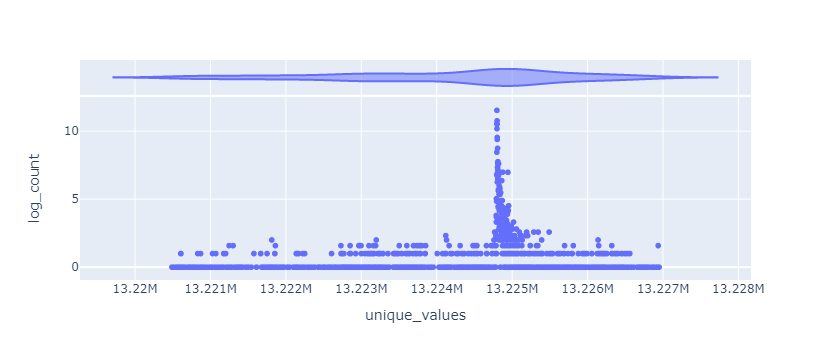

In [6]:
df1_counts['log_count'] = np.log2(df1_counts['counts'])
fig = px.scatter(df1_counts, x="unique_values", y="log_count", marginal_x="violin")
fig.show()

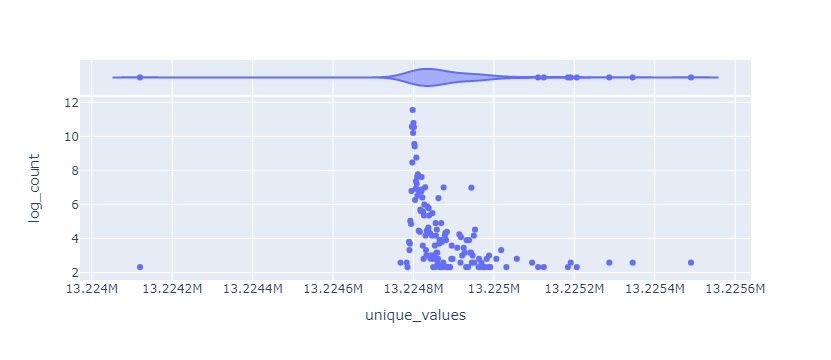

In [8]:
df1_counts1 = df1_counts[df1_counts['log_count'] > 2]
fig = px.scatter(df1_counts1, x="unique_values", y="log_count", marginal_x="violin")
fig.show()